Patrick BROCKMANN - LSCE (Climate and Environment Sciences Laboratory)<br>
<img align="left" width="40%" src="http://www.lsce.ipsl.fr/Css/img/banniere_LSCE_75.png" \><br><br>
<hr>

Last update: 2016/01/06

In [1]:
#http://webportals.ipsl.jussieu.fr/thredds/catalog/EUROCORDEX/cordex_viewer/catalog.html
url = "http://webportals.ipsl.jussieu.fr/thredds/catalog/EUROCORDEX/cordex_viewer/ensemble_statistic"

In [2]:
# Read the URL that display the XML catalog of indices
import urllib2

xmlCatalogEnsemble = url + "/catalog.xml"

file = urllib2.urlopen(xmlCatalogEnsemble)
data = file.read()
file.close()

# Build the list of indices
from xml.dom.minidom import parseString

dom = parseString(data)
a=dom.getElementsByTagName('catalogRef')

indices=[]
for i in range(len(a)):
        indices.append(a[i].getAttribute('xlink:title'))
        
print indices

[u'CDD', u'CWD', u'GD4', u'HD17', u'R20mm', u'RR', u'RR1', u'RX1day', u'RX5day', u'SDII', u'TG', u'TGn', u'TGx']


In [3]:
# Read the URL that display the XML catalog of experiments
xmlCatalogEnsemble = url + "/" + indices[0] + "/catalog.xml"

file = urllib2.urlopen(xmlCatalogEnsemble)
data = file.read()
file.close()

# Build the list of indices
dom = parseString(data)
a=dom.getElementsByTagName('catalogRef')

frequencies=[]
for i in range(len(a)):
        frequencies.append(a[i].getAttribute('xlink:title'))
        
print frequencies

[u'DJF', u'JJA', u'MAM', u'SON', u'yr']


In [5]:
# Read the URL that display the XML catalog of experiments
xmlCatalogEnsemble = url + "/" + indices[0] + "/" + frequencies[0] + "/catalog.xml"

file = urllib2.urlopen(xmlCatalogEnsemble)
data = file.read()
file.close()

# Build the list of indices
dom = parseString(data)
a=dom.getElementsByTagName('catalogRef')

experiments=[]
for i in range(len(a)):
        experiments.append(a[i].getAttribute('xlink:title'))
        
print experiments

[u'rcp45', u'rcp85']


In [6]:
# Read the URL that display the XML catalog of countries
xmlCatalogEnsemble = url + "/" + indices[0] + "/" + frequencies[0] + "/" + experiments[0] + "/catalog.xml"

file = urllib2.urlopen(xmlCatalogEnsemble)
data = file.read()
file.close()

# Build the list of indices
dom = parseString(data)
a=dom.getElementsByTagName('catalogRef')

countries=[]
for i in range(len(a)):
        countries.append(a[i].getAttribute('xlink:title'))
        
print countries

[u'ALB', u'AND', u'AUT', u'BEL', u'BGR', u'BIH', u'BLR', u'CHE', u'CZE', u'DEU', u'DNK', u'ESP', u'EST', u'FIN', u'FRA', u'GBR', u'GRC', u'HRV', u'HUN', u'IMN', u'IRL', u'ISL', u'ITA', u'KOS', u'LTU', u'LUX', u'LVA', u'MDA', u'MKD', u'MNE', u'NLD', u'NOR', u'POL', u'PRT', u'ROU', u'RUS', u'SRB', u'SVK', u'SVN', u'SWE', u'UKR']


In [7]:
import matplotlib
import random

def random_color():                  # find a color that is dark enought (L <= 0.5)
    luminance = 1
    while (luminance > 0.5):
        color = random.choice(matplotlib.colors.cnames.keys())
        #print color
        R,G,B = matplotlib.colors.hex2color(matplotlib.colors.cnames[color]) 
        luminance = (0.299*R + 0.587*G + 0.114*B)
    return color

print random_color()

darkviolet


In [8]:
colors=[]
for i in range(1,20):
    colors.append(random_color())

RR = Precipitation sum) [mm]


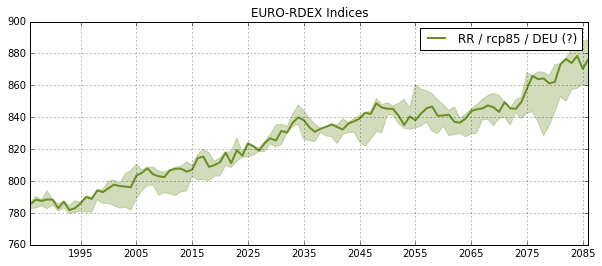

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import netCDF4
from netCDF4 import num2date, date2num, date2index
%matplotlib inline

fig1, ax1 = plt.subplots(figsize=(10,4))

def plot(subplot, indice, frequency, experiment, country, percentile=True, title=None, legend=None, color=None, verbose=False):

    #print indice, experiment, country
    
    if color==None:
        color = random_color()
    
    plotMean = True
    try:
        file = url.replace("catalog", "dodsC") + "/" + indice + "/" + frequency \
                                    + "/" + experiment + "/" + country + "/median.nc"
        f = netCDF4.Dataset(file)
        try: 
            NumberEnsembles = f.NumberEnsembles
        except:
            NumberEnsembles = "?"
        try:
            if verbose:
                print "%s = %s [%s]" %(indice, f.variables[indice].long_name, f.variables[indice].units)
        except:
            pass
        varMean = f.variables[indice][:,0,0]
        times = f.variables["time"]
        dates = num2date(times[:], times.units, calendar="standard")
        f.close()
    except:
        plotMean = False
        print "Not available: " + file
        return

    if percentile:
        percentile_01 = percentile.split(',')[0].replace(' ','')
        percentile_02 = percentile.split(',')[1].replace(' ','')
        try:
            file = url.replace("catalog", "dodsC") + "/" + indice + "/" + frequency \
                                        + "/" + experiment + "/" + country + "/per" + percentile_01 + ".nc"
            f = netCDF4.Dataset(file)
            varPctl_01 = f.variables[indice][:,0,0]
            f.close()
        
            file = url.replace("catalog", "dodsC") + "/" + indice + "/" + frequency \
                                        + "/" + experiment + "/" + country + "/per" + percentile_02 + ".nc"
            f = netCDF4.Dataset(file)
            varPctl_02 = f.variables[indice][:,0,0]
            f.close()
            
        except:
            percentile = False
            print "Percentile files not available"

    subplot.grid(True)

    if legend == None:
        legend = "%s / %s / %s (%s)" %(indice, experiment, country, NumberEnsembles)
    if title:
        plt.title(title)

    if percentile:
        subplot.fill_between(dates, varPctl_01, varPctl_02, facecolor=color, edgecolor=color, alpha=0.3)
    if plotMean:
        subplot.plot(dates, varMean, color=color, lw=2, label=legend)
    subplot.legend()
        
plot(ax1, "RR", "yr", "rcp85", "DEU", title="EURO-RDEX Indices", percentile="33,66", verbose=True)

CDD = Maximum number of consecutive dry days (precipitation < 1 mm) [days]


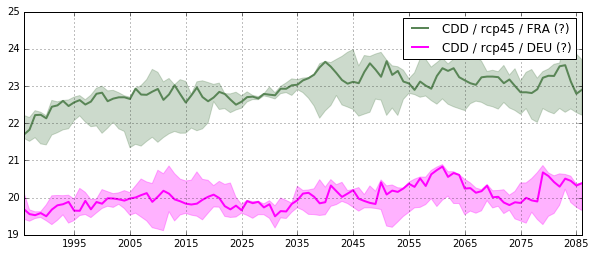

In [15]:
from ipywidgets import interact

@interact(indice=indices, frequency=frequencies, experiment=experiments, country=countries, 
          percentile=["33,66","10,90"])
def plot_interact(indice="TX", frequency="yr", experiment="rcp45", country="DEU", percentile=False):
    fig2, ax2 = plt.subplots(figsize=(10,4))
    plot(ax2, indice, frequency, experiment, "FRA", percentile, color=colors[0], verbose=True)
    plot(ax2, indice, frequency, experiment, country, percentile, color=colors[1])